Importa as classes necessárias e monta o drive para acessar o arquivo de dados.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Lê o arquivo com os dados e apresenta os valores dos 10 primeiros registros

In [ ]:
dados = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mineração de Dados/Aula8/car_evaluation.csv')
print("Quantidade de colunas: ",dados.shape[1])
dados.head(10)

Quantidade de colunas:  7


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


Como os dados não possuem cabeçalho, adiciona os cabeçalhos de cada coluna ao dataframe e reapresenta os 10 primeiros registros.

In [ ]:
colunas = ['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca', 'resultado']
dados.columns = colunas
dados

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Atributos e valores:
1.  preco - Preço de venda:
*  low - baixo;
*  med - médio;
*  high - alto;
*  vhigh - muito alto.  
2.  manutencao - Custo de manutenção:
*  low - baixo;
*  med - médio;
*  high - alto;
*  vhigh - muito alto.
3.  portas - Quantidade de portas:
*  2 - duas;
*  3 - três;
*  4 - quatro;
*  5more - cinco ou mais.
4.  pessoas - Quantidade de pessoas:
*  2 - duas;
*  4 - quatro;
*  more - mais.
5.  bagageiro - Tamanho do bagageiro:
*  small - pequeno;
*  med - médio;
*  big - grande;
6.  segurança - Nível de segurança:
*  low - baixo;
*  med - médio;
*  high - alto.
7.  resultado' - Resultado sobre a análise do carro:
*  unacc - inaceitável;
*  acc - aceitável;
*  good - bom;
*  vgood - muito bom.

Verifica se existe algum valor nulo no conjunto. Como não há valores nulos não precisa eliminar mais nada.

In [ ]:
dados.isna().sum()

preco         0
manutencao    0
portas        0
pessoas       0
bagageiro     0
seguranca     0
resultado     0
dtype: int64

Transforma os valores qualitativos em codificações numéricas.

In [ ]:
le = LabelEncoder()
dados2 = dados
dados2['preco']=le.fit_transform(dados['preco'])
dados2['manutencao']=le.fit_transform(dados['manutencao'])
dados2['portas']=le.fit_transform(dados['portas'])
dados2['pessoas']=le.fit_transform(dados['pessoas'])
dados2['bagageiro']=le.fit_transform(dados['bagageiro'])
dados2['seguranca']=le.fit_transform(dados['seguranca'])
dados2['resultado']=le.fit_transform(dados['resultado'])
dados2.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
5,3,3,0,0,0,1,2
6,3,3,0,0,0,2,2
7,3,3,0,0,0,0,2
8,3,3,0,1,2,1,2
9,3,3,0,1,2,2,2


1. Cria o modelo com todas as variáveis independentes;
2. Divide os dados em 33% para teste e 67% para treinamento;
3. Treina o modelo, usando a entropia para escolher os melhores atributos e limita a profundidade máxima da árvore a 3 níveis. Para usar o índice de gini no lugar da entropia basta atribuir gini ao atributo criterion;
4. Calcula os valores o conjunto de treinamento e as suas medidas de avaliação.
5. Calcula os valores o conjunto de teste e as suas medidas de avaliação.
6. Como os valores são semelhantes indica que não há overfitting.

In [ ]:
X = dados2.drop(["resultado"] ,axis="columns")
y = dados2['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       0.51      0.88      0.64       259
           1       0.00      0.00      0.00        47
           2       0.95      0.84      0.89       808
           3       0.00      0.00      0.00        43

    accuracy                           0.78      1157
   macro avg       0.37      0.43      0.38      1157
weighted avg       0.78      0.78      0.77      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.49      0.89      0.63       125
           1       0.00      0.00      0.00        22
           2       0.96      0.83      0.89       401
           3       0.00      0.00      0.00        22

    accuracy                           0.78       570
   macro avg       0.36      0.43      0.38       570
weighted avg       0.78      0.78      0.76       570



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Apresenta a matriz de confusão do conjunto de teste.

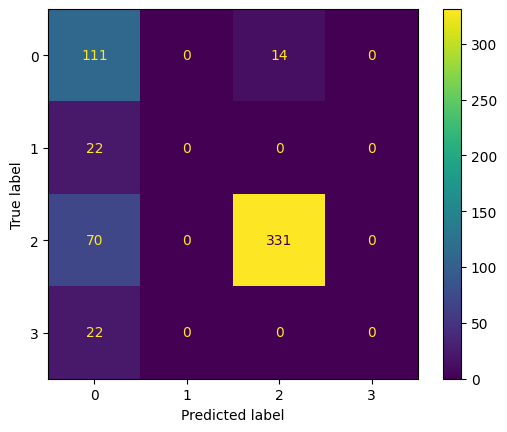

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

Apresenta a árvore de decisão gerada.

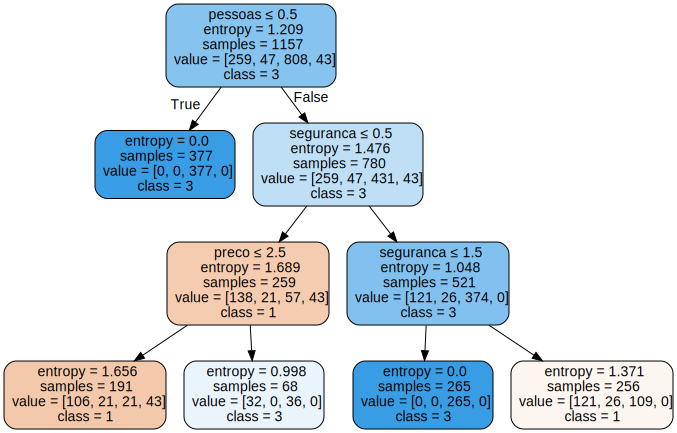

In [ ]:
dot_data = tree.export_graphviz(modelo, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Gera outra árvore de decisão, com os mesmos dados, mas com limite máximo de 5 níveis.


In [ ]:
X = dados2.drop(["resultado"] ,axis="columns")
y = dados2['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       259
           1       0.00      0.00      0.00        47
           2       0.95      0.97      0.96       808
           3       0.46      1.00      0.63        43

    accuracy                           0.88      1157
   macro avg       0.55      0.68      0.59      1157
weighted avg       0.86      0.88      0.87      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       125
           1       0.00      0.00      0.00        22
           2       0.93      0.94      0.93       401
           3       0.44      1.00      0.61        22

    accuracy                           0.84       570
   macro avg       0.52      0.65      0.56       570
weighted avg       0.83      0.84      0.83       570



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Apresenta a matriz de confusão do conjunto de teste.

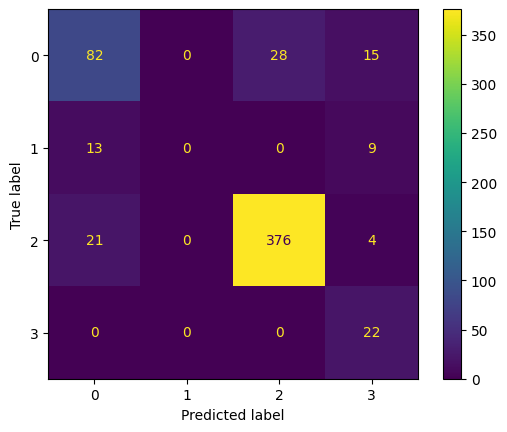

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

Apresenta a árvore gerada.

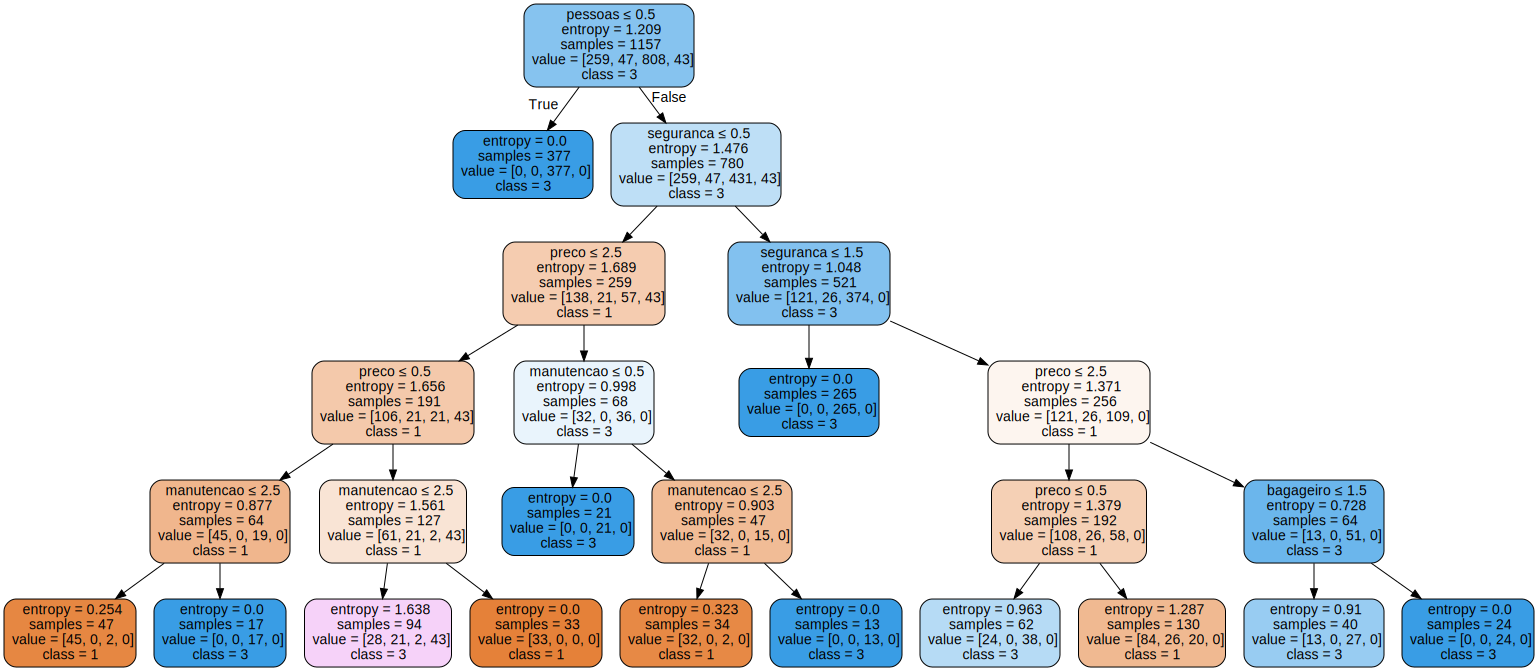

In [ ]:
dot_data = tree.export_graphviz(modelo, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


X = dados2.drop(["resultado"] ,axis="columns")
y = dados2['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)
modelo = RandomForestClassifier(criterion='entropy',max_depth=3)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(cm)

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       0.52      0.28      0.36       259
           1       0.00      0.00      0.00        47
           2       0.79      1.00      0.88       808
           3       0.00      0.00      0.00        43

    accuracy                           0.76      1157
   macro avg       0.33      0.32      0.31      1157
weighted avg       0.67      0.76      0.70      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.52      0.31      0.39       125
           1       0.00      0.00      0.00        22
           2       0.80      0.99      0.88       401
           3       0.00      0.00      0.00        22

    accuracy                           0.76       570
   macro avg       0.33      0.32      0.32       570
weighted avg       0.68      0.76      0.71       570

Matriz de confusão:
[[ 39   0  86   0]
 [  9   0  13   0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif